### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from datetime import datetime
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt, dates
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the data to a DataFrame object.
ncdc_df=pd.read_csv('NCDC COVID-19.csv')

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [3]:
#[Write Your Code Here]
lookup_table_df=pd.read_csv("covid-19-UID_ISO_FIPS_LookUp_Table.csv")
global_con_df=pd.read_csv("daily_covid19_confirmed_global.csv")
global_deaths_df=pd.read_csv("daily_covid19_deaths_global.csv")
global_reco_df=pd.read_csv("daily_covid19_recovered_global.csv")


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [4]:
#[Write Your Code Here]
ext_df=pd.read_csv("covid_external.csv")
budget_df=pd.read_csv("Budget data.csv")
gdp_df=pd.read_csv("Realgdp.csv")

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [5]:
# checking strcuture of our dataset
ncdc_df.shape

(38, 5)

In [6]:
# fetching the first few rows of our dataset
ncdc_df.head(2)

,Confirmed Cases by State,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"99,378",547,"98,062",769


In [7]:
#fetching informatin of dataset
ncdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Confirmed Cases by State  38 non-null     object
 1   Unnamed: 1                38 non-null     object
 2   Unnamed: 2                38 non-null     object
 3   Unnamed: 3                38 non-null     object
 4   Unnamed: 4                38 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [8]:
# finding possible  outliers using descriptive statistics.
ncdc_df.describe()

,Confirmed Cases by State,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,38,38,38,38,38
unique,38,38,27,38,31
top,States Affected,No. of Cases (Lab Confirmed),0,No. Discharged,28
freq,1,1,8,1,3


In [9]:
ncdc_df.isnull()

,Confirmed Cases by State,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Observations of first dataframe above indicate the datasets has:
######     5 columns and 38 rows
######     the columns header not not named.
######     the information in the rows not well formated with commas between numbers and inappropriate data type.
######     as a result of inappropriate data type we cant have statistical description of the dataset.
######     no null value found in the data set.

## Approach to the DataFrame 1
###### re-format and re-name the columns
###### change the data type and remove the commas in the numbers

In [10]:
# finding possible missing data by percentage list
for col in ncdc_df.columns:
    missing_data=np.mean(ncdc_df[col].isnull())
    print('{} - {}%'. format(col, round(missing_data*100)))

Confirmed Cases by State - 0%
Unnamed: 1 - 0%
Unnamed: 2 - 0%
Unnamed: 3 - 0%
Unnamed: 4 - 0%


# View Data 2

In [11]:
lookup_table_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


In [12]:
lookup_table_df.shape

(4316, 12)

In [13]:
lookup_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             4316 non-null   int64  
 1   iso2            4311 non-null   object 
 2   iso3            4312 non-null   object 
 3   code3           4312 non-null   float64
 4   FIPS            3384 non-null   float64
 5   Admin2          3343 non-null   object 
 6   Province_State  4117 non-null   object 
 7   Country_Region  4316 non-null   object 
 8   Lat             4168 non-null   float64
 9   Long_           4168 non-null   float64
 10  Combined_Key    4316 non-null   object 
 11  Population      4165 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 404.8+ KB


In [14]:
lookup_table_df.isnull().sum()

UID                 0
iso2                5
iso3                4
code3               4
FIPS              932
Admin2            973
Province_State    199
Country_Region      0
Lat               148
Long_             148
Combined_Key        0
Population        151
dtype: int64

### The above Dataset is observed to be global dataset which has:
###### 12 columns and 4316 rows
###### missing values also observed
###### data types presents are float, int and object

### Approach to the dataFrame 2
#### since we are only interested in nigeira covid cases on this project.
##### Rows with Nigeria data will be extracted and be cleaned.

In [15]:
global_con_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178901,178901,178901,178905,178919,178922,178981,179010,179017,179131
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275177,275191,275211,275266,275310,275341,275366,275372,275416,275440
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265782,265782,265782,265786,265791,265794,265798,265800,265804,265806
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41349,41349,41717,41717,41717,41717,41717,41717,41717,41717
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [16]:
global_con_df.shape

(284, 845)

In [17]:
global_con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 845 entries, Province/State to 5/11/22
dtypes: float64(2), int64(841), object(2)
memory usage: 1.8+ MB


In [18]:
# finding possible outliers using descriptive statistics.
global_con_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,...,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02
mean,20.106368,21.958718,1.961268,2.313380,3.323944,5.059859,7.464789,10.31338,19.647887,21.721831,...,1.810860e+06,1.813301e+06,1.815479e+06,1.817557e+06,1.819769e+06,1.820987e+06,1.821915e+06,1.824146e+06,1.826722e+06,1.829165e+06
std,25.841453,75.893366,26.402603,26.499491,32.992032,45.919425,64.175242,86.46777,212.163754,213.470672,...,6.642309e+06,6.648576e+06,6.656680e+06,6.663340e+06,6.671655e+06,6.674616e+06,6.676135e+06,6.683341e+06,6.690655e+06,6.700601e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.045950e+04,1.048600e+04,1.048600e+04,1.052625e+04,1.070800e+04,1.070800e+04,1.073850e+04,1.088575e+04,1.090100e+04,1.102125e+04
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,8.651400e+04,8.651500e+04,8.651650e+04,8.651750e+04,8.814250e+04,8.814250e+04,8.814250e+04,8.814250e+04,8.814250e+04,8.814250e+04
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,8.767388e+05,8.770825e+05,8.773272e+05,8.778038e+05,8.778252e+05,8.778252e+05,8.836205e+05,8.899940e+05,8.961755e+05,9.013078e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.00000,3554.000000,3554.000000,...,8.145827e+07,8.150662e+07,8.162072e+07,8.170785e+07,8.183161e+07,8.185850e+07,8.186348e+07,8.197366e+07,8.205984e+07,8.222317e+07


In [19]:
# finding number of null value
global_con_df.isnull().sum()

Province/State    195
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/7/22              0
5/8/22              0
5/9/22              0
5/10/22             0
5/11/22             0
Length: 845, dtype: int64

<AxesSubplot:>

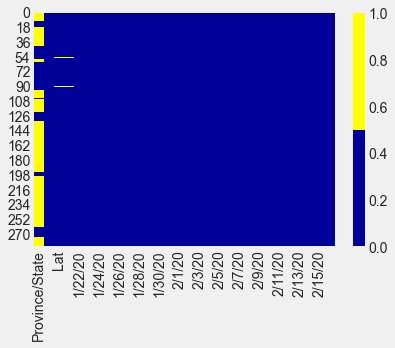

In [20]:
# finding missing data using heatmap
cols=global_con_df.columns[:30]
colors=['#000099', '#ffff00']
sns.heatmap(global_con_df[cols].isnull(),cmap=sns.color_palette(colors))

###  3rd Observation for the third dataframe:
###### its observed that the dataframe has 284 rows, 845 columns
###### its also observed we have numbers of outliers in our dataset
###### also the columns are  not well formated.
###### the chat above shows there is a lot of missing values in the first columns 
###### the dataset requires cleaning and manipulation in both rows, columns and datatype

### Approach 3
###### change data type and drop some columns
###### rename columns where necessary and restructure the dataset

In [21]:
global_deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7683,7683,7683,7684,7684,7684,7684,7685,7685,7686
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3497,3497,3497,3497


In [22]:
global_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 845 entries, Province/State to 5/11/22
dtypes: float64(2), int64(841), object(2)
memory usage: 1.8+ MB


In [23]:
global_deaths_df.isnull().sum()

Province/State    195
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/7/22              0
5/8/22              0
5/9/22              0
5/10/22             0
5/11/22             0
Length: 845, dtype: int64

In [24]:
global_deaths_df.shape

(284, 845)

In [25]:
global_deaths_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,20.106368,21.958718,0.059859,0.063380,0.091549,0.147887,0.197183,0.288732,0.461268,0.468310,...,21965.764085,21974.975352,21988.961268,21998.309859,22006.433099,22010.088028,22012.559859,22018.591549,22027.341549,22036.464789
std,25.841453,75.893366,1.008764,1.010299,1.426181,2.374622,3.087051,4.510813,7.417526,7.418036,...,86618.208878,86657.886665,86744.794281,86768.601072,86794.678466,86806.982161,86811.754979,86828.470530,86853.757545,86900.188523
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.500000,55.500000,55.500000,55.750000,56.500000,56.500000,56.500000,56.750000,57.750000,57.750000
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,848.500000,848.500000,848.500000,848.500000,848.500000,848.500000,848.500000,848.500000,858.500000,862.500000
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8240.000000,8242.250000,8247.000000,8247.000000,8248.500000,8249.250000,8250.000000,8250.750000,8256.500000,8260.250000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,993948.000000,994697.000000,996656.000000,996964.000000,997318.000000,997503.000000,997526.000000,997740.000000,998048.000000,998997.000000


<AxesSubplot:>

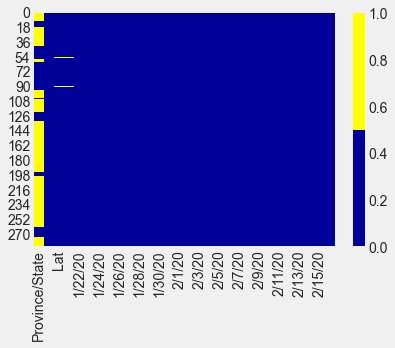

In [26]:
# finding missing data using heatmap
cols=global_deaths_df.columns[:30]
colors=['#000099', '#ffff00']
sns.heatmap(global_deaths_df[cols].isnull(),cmap=sns.color_palette(colors))

In [27]:
global_reco_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
global_reco_df.shape

(269, 845)

In [29]:
global_reco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Columns: 845 entries, Province/State to 5/11/22
dtypes: float64(2), int64(841), object(2)
memory usage: 1.7+ MB


In [30]:
global_reco_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
count,268.000000,268.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0
mean,18.700014,27.186914,0.111524,0.118959,0.144981,0.156134,0.208178,0.241636,0.401487,0.472119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,25.330841,73.614830,1.711086,1.714940,1.903792,1.967499,2.591851,2.786758,4.911394,5.402128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.454096,-9.496274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.584785,23.614150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,39.132000,91.814200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
global_reco_df.isnull().sum()

Province/State    196
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
5/7/22              0
5/8/22              0
5/9/22              0
5/10/22             0
5/11/22             0
Length: 845, dtype: int64

<AxesSubplot:>

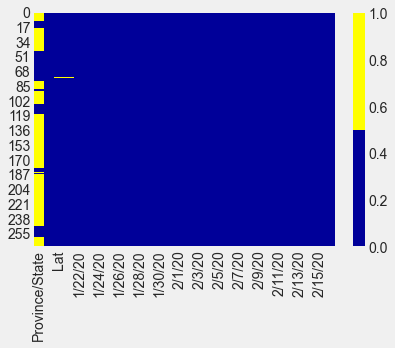

In [32]:
# finding missing data using heatmap
cols=global_reco_df.columns[:30]
colors=['#000099', '#ffff00']
sns.heatmap(global_reco_df[cols].isnull(),cmap=sns.color_palette(colors))

### 4th Observation of covid-19 related datasets:
###### its observed that recovery, confirmed and deaths datasets has same data structure and it requires same approach.
### Approach 4
###### the approach is going to be same approaches required on the above dataset since they have same structure.

In [33]:
ext_df.head(2)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [34]:
ext_df.shape

(37, 12)

In [35]:
ext_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [36]:
# finding  null value in the dataframe 
ext_df.isnull()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
ext_df.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [38]:
budget_df.head(2)

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.6,102.70
1,Adamawa,183.3,139.31


In [39]:
budget_df.shape

(37, 3)

In [40]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [41]:
budget_df.isnull()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [42]:
budget_df.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [43]:
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [44]:
gdp_df.shape

(7, 5)

In [45]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [46]:
gdp_df.isnull()

,Year,Q1,Q2,Q3,Q4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False


In [47]:
gdp_df.describe()

,Year,Q1,Q2,Q3,Q4
count,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2017.000000,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,2.160247,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,2014.000000,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,2015.500000,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,2017.000000,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,2018.500000,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,2020.000000,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

In [48]:
ncdc_df.head(3)

,Confirmed Cases by State,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"99,378",547,"98,062",769
2,FCT,"28,660",36,"28,376",248


In [49]:
# initial header was removed and Used First Row as a Header
ncdc_df=pd.DataFrame(ncdc_df.values[1:], columns=ncdc_df.iloc[0])

In [50]:
ncdc_df.head(2)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"99,378",547,"98,062",769
1,FCT,"28,660",36,"28,376",248


In [51]:
# rename the columns of scraped data
ncdc_df.rename(columns={'States Affected':'states','No. of Cases (Lab Confirmed)':'No._of_Cases_Lab_Confirmed','No. of Cases (on admission)':'No._of_Cases_on_admission',
                       'No. Discharged':'No._of_Discharged','No. of Deaths':'No._of_Deaths'}, inplace = True)

## Data type conversion and removal of comma(',') in numerical data

In [52]:
# converting the datatype from string(object) to int and removing the commas
ncdc_df['No._of_Cases_Lab_Confirmed']=ncdc_df['No._of_Cases_Lab_Confirmed'].astype(str)
ncdc_df["No._of_Cases_Lab_Confirmed"] = ncdc_df["No._of_Cases_Lab_Confirmed"].str.replace(',', '')
ncdc_df['No._of_Cases_Lab_Confirmed']=ncdc_df['No._of_Cases_Lab_Confirmed'].astype(int)

ncdc_df['No._of_Cases_on_admission']=ncdc_df['No._of_Cases_on_admission'].astype(str)
ncdc_df['No._of_Cases_on_admission']= ncdc_df['No._of_Cases_on_admission'].astype(int)

ncdc_df['No._of_Discharged']=ncdc_df['No._of_Discharged'].astype(str)
ncdc_df["No._of_Discharged"] = ncdc_df["No._of_Discharged"].str.replace(',', '')
ncdc_df['No._of_Discharged']=ncdc_df['No._of_Discharged'].astype(int)

ncdc_df['No._of_Deaths']=ncdc_df['No._of_Deaths'].astype(str)
ncdc_df['No._of_Deaths']=ncdc_df['No._of_Deaths'].astype(int)


#ncdc_df.columns = [col.replace(',', '') for col in ncdc_df.columns]

In [53]:
ncdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   states                      37 non-null     object
 1   No._of_Cases_Lab_Confirmed  37 non-null     int32 
 2   No._of_Cases_on_admission   37 non-null     int32 
 3   No._of_Discharged           37 non-null     int32 
 4   No._of_Deaths               37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


In [54]:
ncdc_df.describe()

,No._of_Cases_Lab_Confirmed,No._of_Cases_on_admission,No._of_Discharged,No._of_Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,6913.567568,73.594595,6755.027027,84.945946
std,16543.167661,133.343637,16343.356854,134.574421
min,5.000000,0.000000,3.000000,2.000000
25%,1315.000000,1.000000,1287.000000,25.000000
50%,2560.000000,13.000000,2381.000000,37.000000
75%,5173.000000,62.000000,4860.000000,89.000000
max,99378.000000,547.000000,98062.000000,769.000000


In [55]:
ncdc_df_sort=ncdc_df.sort_values('states', ascending=True).set_index('states')

In [56]:
ncdc_df_sort

,No._of_Cases_Lab_Confirmed,No._of_Cases_on_admission,No._of_Discharged,No._of_Deaths
states,,,,
Abia,2176,1,2141,34
Adamawa,1203,68,1103,32
Akwa Ibom,4657,27,4586,44
Anambra,2825,46,2760,19
Bauchi,1960,3,1933,24
Bayelsa,1315,0,1287,28
Benue,2129,340,1764,25
Borno,1629,5,1580,44
Cross River,829,0,804,25


In [57]:
ext_df_sort=ext_df.sort_values('states', ascending=True)

In [58]:
ext_df_sort.set_index('states')

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
states,,,,,,,,,,,
Abia,South East,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14
Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94
Akwa Ibom,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01
Anambra,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08
Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
Bayelsa,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00
Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89
Cross river,South South,4272000,0.5,0.4,0.7,0.8,0.1,0.4,0.4,0.6,0.98


## Extract daily data for Nigeria from the Global daily cases data

In [59]:
#Extract daily data for Nigeria from the Global daily cases data=recovery

NGA_lookup_table_df= lookup_table_df.loc[lookup_table_df['Country_Region']=='Nigeria']

In [60]:
# reseting scraped data index
NGA_lookup_table_df.reset_index(drop=True, inplace=True)

In [61]:
NGA_lookup_table_df.shape

(39, 12)

In [62]:
NGA_lookup_table_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,566,NG,NGA,566.0,NaN,NaN,NaN,Nigeria,9.0820,8.6753,Nigeria,206139587.0
1,56601,NG,NGA,566.0,NaN,NaN,Abia,Nigeria,5.4527,7.5248,"Abia, Nigeria",3727347.0
2,56602,NG,NGA,566.0,NaN,NaN,Adamawa,Nigeria,9.3265,12.3984,"Adamawa, Nigeria",4248436.0
3,56603,NG,NGA,566.0,NaN,NaN,Akwa Ibom,Nigeria,4.9057,7.8537,"Akwa Ibom, Nigeria",5482177.0
4,56604,NG,NGA,566.0,NaN,NaN,Anambra,Nigeria,6.2209,6.9370,"Anambra, Nigeria",5527809.0


In [63]:
NGA_lookup_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             39 non-null     int64  
 1   iso2            39 non-null     object 
 2   iso3            39 non-null     object 
 3   code3           39 non-null     float64
 4   FIPS            0 non-null      float64
 5   Admin2          0 non-null      object 
 6   Province_State  38 non-null     object 
 7   Country_Region  39 non-null     object 
 8   Lat             38 non-null     float64
 9   Long_           38 non-null     float64
 10  Combined_Key    39 non-null     object 
 11  Population      38 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.8+ KB


In [64]:
NGA_lookup_table_df.isnull().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              39
Admin2            39
Province_State     1
Country_Region     0
Lat                1
Long_              1
Combined_Key       0
Population         1
dtype: int64

In [65]:
NGA_lookup_table_df.describe()

,UID,code3,FIPS,Lat,Long_,Population
count,39.000000,39.0,0.0,38.000000,38.000000,3.800000e+01
mean,55182.230769,566.0,NaN,8.483053,7.397163,1.051685e+07
std,8975.750168,0.0,NaN,2.477414,2.442512,3.267478e+07
min,566.000000,566.0,NaN,4.771900,3.473700,2.277961e+06
25%,56609.500000,566.0,NaN,6.526800,5.681325,3.762078e+06
50%,56619.000000,566.0,NaN,8.078400,7.310800,4.688642e+06
75%,56628.500000,566.0,NaN,10.373250,8.656175,5.806576e+06
max,56638.000000,566.0,NaN,13.053300,13.152000,2.061396e+08


### observation from the extracted dataset above :
###### there are 12 columns and 39 rows
###### there are null values and missing data.
###### There is huge difference between the 75% and max values of population col.
### Approach 1
###### some columns : FIPS, Admin2 will be dropped because it has no values. Province_State	Country_Region will be dropped
###### since we have column(Combined_Key) that combined the two. which will be renamed
###### and row index[0] and [39] will be dropped 
##### filling the Nan value
###### and identify the outliers and fix it.

In [66]:
# dropped columns(Country_Region,province_state are dropped because a column'combined_key' already has the detail.)
NGA_lookup_table_df.drop(['FIPS','Admin2','Province_State','Country_Region'], inplace=True, axis=1)

In [67]:
# dropping irrelevant row from the dataframe 
NGA_lookup_table_df.drop([0,38])

,UID,iso2,iso3,code3,Lat,Long_,Combined_Key,Population
1,56601,NG,NGA,566.0,5.4527,7.5248,"Abia, Nigeria",3727347.0
2,56602,NG,NGA,566.0,9.3265,12.3984,"Adamawa, Nigeria",4248436.0
3,56603,NG,NGA,566.0,4.9057,7.8537,"Akwa Ibom, Nigeria",5482177.0
4,56604,NG,NGA,566.0,6.2209,6.9370,"Anambra, Nigeria",5527809.0
5,56605,NG,NGA,566.0,10.7761,9.9992,"Bauchi, Nigeria",6537314.0
6,56606,NG,NGA,566.0,4.7719,6.0699,"Bayelsa, Nigeria",2277961.0
7,56607,NG,NGA,566.0,7.3369,8.7404,"Benue, Nigeria",5741815.0
8,56608,NG,NGA,566.0,11.8846,13.1520,"Borno, Nigeria",5860183.0
9,56609,NG,NGA,566.0,5.8702,8.5988,"Cross River, Nigeria",3866269.0
10,56610,NG,NGA,566.0,5.7040,5.9339,"Delta, Nigeria",5663362.0


In [68]:
# reseting data index
NGA_lookup_table_df.reset_index(drop=True, inplace=True)

<AxesSubplot:>

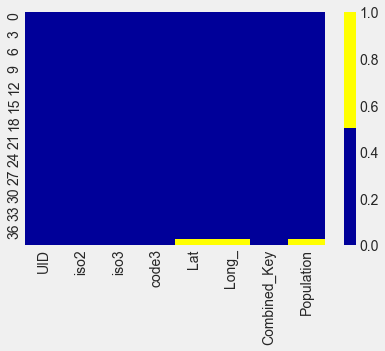

In [69]:
# finding missing data using heatmap
cols=NGA_lookup_table_df.columns[:30]
colors=['#000099', '#ffff00']
sns.heatmap(NGA_lookup_table_df[cols].isnull(),cmap=sns.color_palette(colors))

In [70]:
# finding missing data by percentage list
for col in NGA_lookup_table_df.columns:
    missing_data=np.mean(NGA_lookup_table_df[col].isnull())
    print('{} - {}%'. format(col, round(missing_data*100)))

UID - 0%
iso2 - 0%
iso3 - 0%
code3 - 0%
Lat - 3%
Long_ - 3%
Combined_Key - 0%
Population - 3%


In [71]:
# replacing the missing data with mean for population column
NGA_lookup_table_df['Population'].fillna(NGA_lookup_table_df['Population'].median(), inplace=True)

In [72]:
NGA_lookup_table_df['Lat'].fillna(NGA_lookup_table_df['Lat'].median(), inplace=True)

In [73]:
NGA_lookup_table_df['Long_'].fillna(NGA_lookup_table_df['Long_'].median(), inplace=True)

In [74]:
NGA_lookup_table_df.describe()

,UID,code3,Lat,Long_,Population
count,39.000000,39.0,39.000000,39.000000,3.900000e+01
mean,55182.230769,566.0,8.472677,7.394949,1.036740e+07
std,8975.750168,0.0,2.445458,2.410199,3.225548e+07
min,566.000000,566.0,4.771900,3.473700,2.277961e+06
25%,56609.500000,566.0,6.530000,5.764350,3.796808e+06
50%,56619.000000,566.0,8.078400,7.310800,4.688642e+06
75%,56628.500000,566.0,10.370100,8.637050,5.784989e+06
max,56638.000000,566.0,13.053300,13.152000,2.061396e+08


### Extracting daily cases for Nigeria in Global Datasets for covid-19

In [75]:
# extracting daily confirmed cases for nigeria in global datasets for covid-19
NGA_Confirmed_case= global_con_df.loc[global_con_df['Country/Region']=='Nigeria']

In [76]:
NGA_death_case= global_deaths_df.loc[global_deaths_df['Country/Region']=='Nigeria']

In [77]:
NGA_recov_case= global_reco_df.loc[global_reco_df['Country/Region']=='Nigeria']

In [78]:
NGA_Confirmed_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
203,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,255753,255766,255766,255766,255766,255766,255766,255766,255802,255802


In [79]:
NGA_death_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
203,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3143,3143,3143,3143,3143,3143,3143,3143,3143,3143


In [80]:
NGA_recov_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
188,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# combining daily cases for nigeria
NGA_Daily_Covid_case= pd.concat([NGA_Confirmed_case,NGA_recov_case,NGA_death_case], ignore_index=True)

In [82]:
NGA_Daily_Covid_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,255753,255766,255766,255766,255766,255766,255766,255766,255802,255802
1,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3143,3143,3143,3143,3143,3143,3143,3143,3143,3143


In [83]:
# dropping non-relevant columns
NGA_Daily_Covid_case.drop(['Province/State','Lat','Long'], inplace=True, axis=1)

In [84]:
# transposing rows and columns
NGA_covid_19_case= NGA_Daily_Covid_case.transpose()

In [85]:
NGA_covid_19_case

,0,1,2
Country/Region,Nigeria,Nigeria,Nigeria
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
...,...,...,...
5/7/22,255766,0,3143
5/8/22,255766,0,3143
5/9/22,255766,0,3143
5/10/22,255802,0,3143


### Droping the header and make the first row the new headers

In [86]:
# dropping the initial header
NGA_covid_19_case.rename(columns=NGA_covid_19_case.iloc[0]).drop(NGA_covid_19_case.index[0])

,Nigeria,Nigeria,Nigeria
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
5/7/22,255766,0,3143
5/8/22,255766,0,3143
5/9/22,255766,0,3143
5/10/22,255802,0,3143


In [87]:
# reseting the index of extracted dataset
NGA_covid_19_case.reset_index(inplace = True)

In [88]:
NGA_covid_19_case

,index,0,1,2
0,Country/Region,Nigeria,Nigeria,Nigeria
1,1/22/20,0,0,0
2,1/23/20,0,0,0
3,1/24/20,0,0,0
4,1/25/20,0,0,0
...,...,...,...,...
837,5/7/22,255766,0,3143
838,5/8/22,255766,0,3143
839,5/9/22,255766,0,3143
840,5/10/22,255802,0,3143


In [89]:
# rename the columns of scraped data
NGA_covid_19_case.rename(columns={'index':'Date', 0:'NGA_Confirmed_Cases',
            1:'NGA_recovery_Cases',2:'NGA_Daily_Death_Cases'}, inplace = True)

In [90]:
# dropping the first row of the transposed dataset
NGA_covid_19_case.drop(NGA_covid_19_case[(NGA_covid_19_case['Date']=='Country/Region')].index, inplace=True)

In [91]:
# converting date dtype to datetime
NGA_covid_19_case['Date'] = NGA_covid_19_case['Date'].astype('datetime64[ns]')

In [92]:
# converting the datatype from string(object) to int
NGA_covid_19_case[['NGA_Confirmed_Cases','NGA_recovery_Cases','NGA_Daily_Death_Cases']] = NGA_covid_19_case[['NGA_Confirmed_Cases','NGA_recovery_Cases','NGA_Daily_Death_Cases']].apply(pd.to_numeric)

In [93]:
NGA_covid_19_case.tail()

,Date,NGA_Confirmed_Cases,NGA_recovery_Cases,NGA_Daily_Death_Cases
837,2022-05-07,255766,0,3143
838,2022-05-08,255766,0,3143
839,2022-05-09,255766,0,3143
840,2022-05-10,255802,0,3143
841,2022-05-11,255802,0,3143


In [94]:
NGA_covid_19_case.describe()

,NGA_Confirmed_Cases,NGA_recovery_Cases,NGA_Daily_Death_Cases
count,841.000000,841.000000,841.000000
mean,129332.662307,46958.486326,1724.695600
std,89306.604793,60990.704863,1065.291874
min,0.000000,0.000000,0.000000
25%,50488.000000,0.000000,985.000000
50%,161261.000000,4351.000000,2027.000000
75%,208404.000000,77299.000000,2761.000000
max,255802.000000,165208.000000,3143.000000


In [95]:
NGA_covid_19_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 1 to 841
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   841 non-null    datetime64[ns]
 1   NGA_Confirmed_Cases    841 non-null    int64         
 2   NGA_recovery_Cases     841 non-null    int64         
 3   NGA_Daily_Death_Cases  841 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 32.9 KB


### Renaming the Header of the DataFrame

In [96]:
# sorting number of cases(on admission)
Top_10_confirmed_cases_by_states= ncdc_df.sort_values(["No._of_Cases_Lab_Confirmed"], axis=0, ascending=False)[:10]

In [97]:
Top_10_confirmed_cases_by_states

,states,No._of_Cases_Lab_Confirmed,No._of_Cases_on_admission,No._of_Discharged,No._of_Deaths
0,Lagos,99378,547,98062,769
1,FCT,28660,36,28376,248
2,Rivers,16677,32,16491,154
3,Kaduna,11278,1,11188,89
4,Plateau,10253,2,10176,75
5,Oyo,10224,4,10018,202
6,Edo,7694,0,7373,321
7,Ogun,5810,11,5717,82
8,Delta,5395,114,5170,111
9,Ondo,5173,315,4749,109


<AxesSubplot:xlabel='states'>

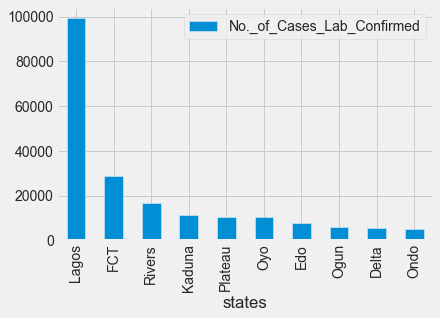

In [98]:
Top_10_confirmed_cases_by_states.plot.bar(x='states',y='No._of_Cases_Lab_Confirmed')

In [99]:
NGA_lookup_table_df

,UID,iso2,iso3,code3,Lat,Long_,Combined_Key,Population
0,566,NG,NGA,566.0,9.0820,8.6753,Nigeria,206139587.0
1,56601,NG,NGA,566.0,5.4527,7.5248,"Abia, Nigeria",3727347.0
2,56602,NG,NGA,566.0,9.3265,12.3984,"Adamawa, Nigeria",4248436.0
3,56603,NG,NGA,566.0,4.9057,7.8537,"Akwa Ibom, Nigeria",5482177.0
4,56604,NG,NGA,566.0,6.2209,6.9370,"Anambra, Nigeria",5527809.0
5,56605,NG,NGA,566.0,10.7761,9.9992,"Bauchi, Nigeria",6537314.0
6,56606,NG,NGA,566.0,4.7719,6.0699,"Bayelsa, Nigeria",2277961.0
7,56607,NG,NGA,566.0,7.3369,8.7404,"Benue, Nigeria",5741815.0
8,56608,NG,NGA,566.0,11.8846,13.1520,"Borno, Nigeria",5860183.0
9,56609,NG,NGA,566.0,5.8702,8.5988,"Cross River, Nigeria",3866269.0


TODO A - Clean the scraped data

In [100]:
# filtering dataset by columns and boolean index and drop the rows with zero value in location and new_cases
NGA_covid_19_case =NGA_covid_19_case.loc[(NGA_covid_19_case.NGA_Confirmed_Cases != 0),:]

In [101]:
NGA_covid_19_case

,Date,NGA_Confirmed_Cases,NGA_recovery_Cases,NGA_Daily_Death_Cases
38,2020-02-28,1,0,0
39,2020-02-29,1,0,0
40,2020-03-01,1,0,0
41,2020-03-02,1,0,0
42,2020-03-03,1,0,0
...,...,...,...,...
837,2022-05-07,255766,0,3143
838,2022-05-08,255766,0,3143
839,2022-05-09,255766,0,3143
840,2022-05-10,255802,0,3143


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [102]:
#the first case was recorded on 28th of Feb, 2020
Confirmed_case_df=NGA_covid_19_case.loc[(NGA_covid_19_case.NGA_Confirmed_Cases != 0),['Date','NGA_Confirmed_Cases']]

In [103]:
Confirmed_case_df

,Date,NGA_Confirmed_Cases
38,2020-02-28,1
39,2020-02-29,1
40,2020-03-01,1
41,2020-03-02,1
42,2020-03-03,1
...,...,...
837,2022-05-07,255766
838,2022-05-08,255766
839,2022-05-09,255766
840,2022-05-10,255802


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [104]:
#recovered_df=NGA_covid_19_case.groupby('Date')['NGA_recovery_Cases'].sum()

In [105]:
# the first recovery case was recorded on 2020-30-18
recovery_df=NGA_covid_19_case.loc[(NGA_covid_19_case.NGA_recovery_Cases != 0),['Date','NGA_recovery_Cases']]

In [106]:
recovery_df

,Date,NGA_recovery_Cases
57,2020-03-18,1
58,2020-03-19,1
59,2020-03-20,1
60,2020-03-21,1
61,2020-03-22,2
...,...,...
557,2021-07-31,164994
558,2021-08-01,165005
559,2021-08-02,165037
560,2021-08-03,165122


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [107]:
# the dataframe indicated the first death case was recorded on 2020-30-18
#daily_death_case =NGA_covid_19_case.groupby('Date')['NGA_Daily Death Cases'].sum()
daily_death_case=NGA_covid_19_case.loc[(NGA_covid_19_case.NGA_Daily_Death_Cases != 0),['Date','NGA_Daily_Death_Cases']]

In [108]:
daily_death_case.tail()

,Date,NGA_Daily_Death_Cases
837,2022-05-07,3143
838,2022-05-08,3143
839,2022-05-09,3143
840,2022-05-10,3143
841,2022-05-11,3143


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

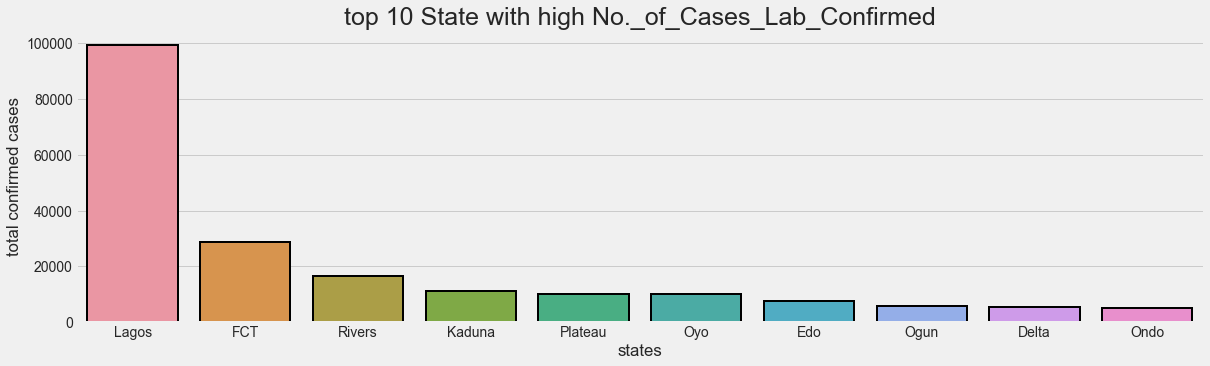

In [109]:
top_10_Confirmed_cases=ncdc_df.groupby(by= 'states').max()[['No._of_Cases_Lab_Confirmed']].sort_values(by=['No._of_Cases_Lab_Confirmed'], ascending = False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title('top 10 State with high No._of_Cases_Lab_Confirmed', size=25)
ax = sns.barplot(data=top_10_Confirmed_cases.iloc[:10], y= 'No._of_Cases_Lab_Confirmed', x = 'states', linewidth=2, edgecolor = 'black')
plt.xlabel('states')
plt.ylabel('total confirmed cases')
plt.show()

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

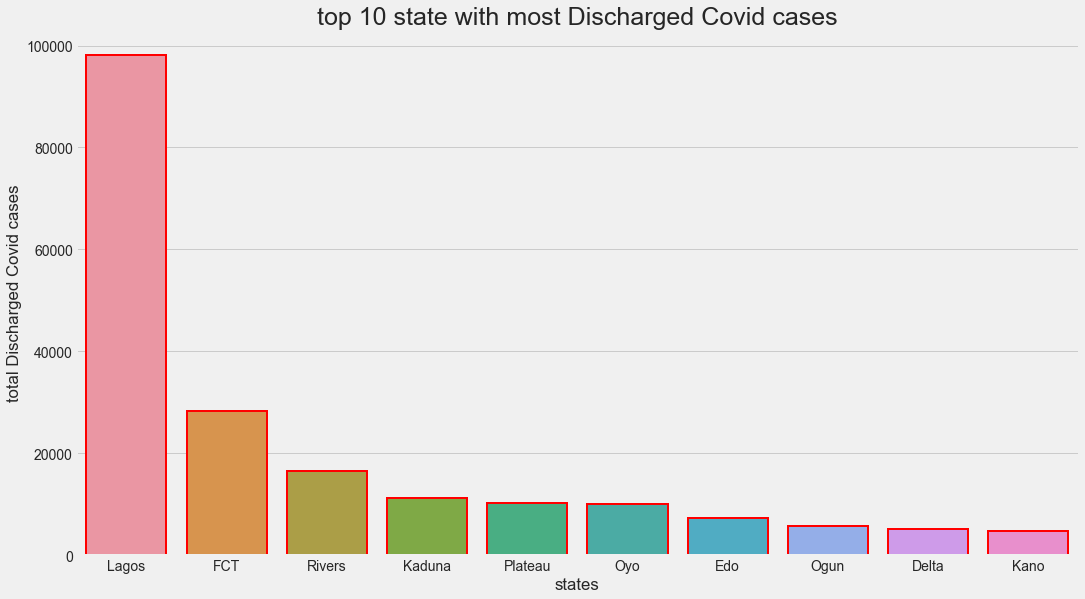

In [110]:
# finding top 10 states with Discharged Covid cases
top_10_new_covid_cases= ncdc_df.groupby(by= 'states').max()[['No._of_Discharged']].sort_values(by= ['No._of_Discharged'], ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title('top 10 state with most Discharged Covid cases', size=25)
ax = sns.barplot(data=top_10_new_covid_cases.iloc[:10],y= 'No._of_Discharged', x = 'states', linewidth=2, edgecolor = 'red')
plt.xlabel('states')
plt.ylabel('total Discharged Covid cases')
plt.show()

TODO D - Plot the top 10 Death cases

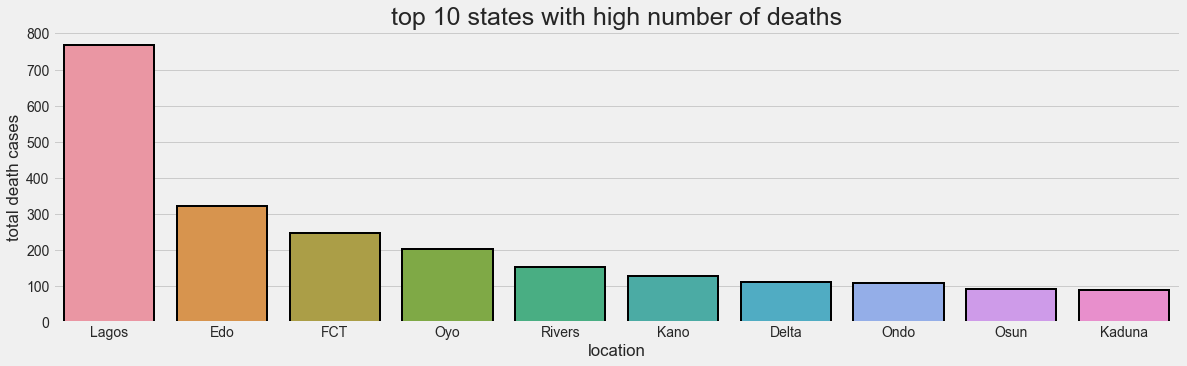

In [111]:
top_10_deaths_cases=ncdc_df.groupby(by= 'states').max()[['No._of_Deaths']].sort_values(by=['No._of_Deaths'], ascending = False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title('top 10 states with high number of deaths', size=25)
ax = sns.barplot(data=top_10_deaths_cases.iloc[:10], y= 'No._of_Deaths', x = 'states', linewidth=2, edgecolor = 'black')
plt.xlabel('location')
plt.ylabel('total death cases')
plt.show()

###### The plot above visualize the states that has highest number of covid cases.
###### the first bar plot visualize the states with highest number of confirmed cases. which the highest of them is Lagos.
###### while the second plot visualise the states with highest discharge cases.
###### and the last plot visualise the states with highest number of death cases.

#### with the observations above. this indicates that the more populated and busy the states are, the more they were affected. and the more the attentions was given to control the cases.

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [112]:
NGA_covid_19_case_plot=NGA_covid_19_case.loc[(NGA_covid_19_case['NGA_Confirmed_Cases'] != 0),
                                             ['NGA_Confirmed_Cases','NGA_recovery_Cases','NGA_Daily_Death_Cases']]

In [113]:
# finding the total covid_19 cases
NGA_covid_19_case_plot.max()

NGA_Confirmed_Cases      255802
NGA_recovery_Cases       165208
NGA_Daily_Death_Cases      3143
dtype: int64

##### Visualizing the result of our covid 19 cases above. with the below plot.
##### line plot to visualize the covid 19 cases in nigeria.
##### the plot indicate we have minimal mortality of covid_19 cases againt the maximum confirmed cases


<AxesSubplot:>

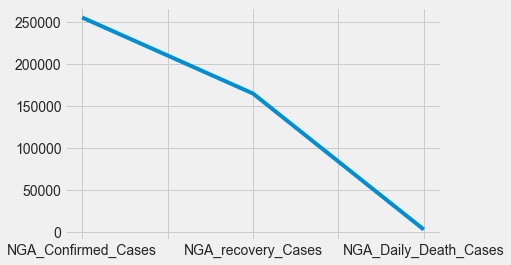

In [114]:
NGA_covid_19_case_plot.max().plot.line(rot=0)

In [115]:
#line  plot for the total daily confirmed, recovered and death cases in Nigeria
#NGA_covid_19_case_plot.plot.line()

<AxesSubplot:xlabel='Date'>

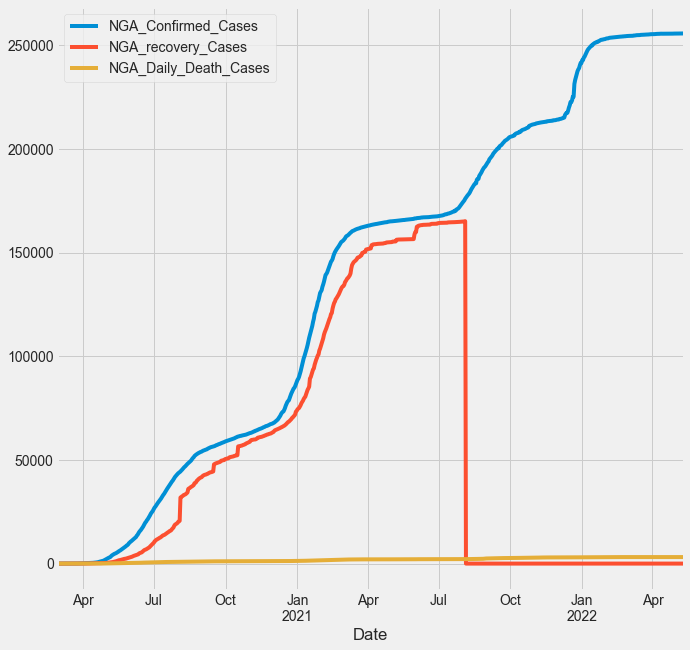

In [116]:
NGA_covid_19_case.plot(x='Date',y=['NGA_Confirmed_Cases','NGA_recovery_Cases','NGA_Daily_Death_Cases'], kind='line', 
                       figsize= (10,10))

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [147]:
NGA_covid_19_case['Date']=pd.to_datetime(NGA_covid_19_case['Date']).dt.date

In [148]:
NGA_covid_19_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 38 to 841
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   804 non-null    object
 1   NGA_Confirmed_Cases    804 non-null    int64 
 2   NGA_recovery_Cases     804 non-null    int64 
 3   NGA_Daily_Death_Cases  804 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [149]:
daily_diff=NGA_covid_19_case.diff(axis = 0, periods = 1).sort_values(by='Date', ascending =False)

In [150]:
daily_diff

,Date,NGA_Confirmed_Cases,NGA_recovery_Cases,NGA_Daily_Death_Cases
39,"1 day, 0:00:00",0.0,0.0,0.0
578,"1 day, 0:00:00",0.0,0.0,0.0
568,"1 day, 0:00:00",790.0,0.0,1.0
569,"1 day, 0:00:00",753.0,0.0,5.0
570,"1 day, 0:00:00",636.0,0.0,11.0
...,...,...,...,...
310,"1 day, 0:00:00",169.0,92.0,0.0
311,"1 day, 0:00:00",246.0,101.0,2.0
312,"1 day, 0:00:00",110.0,133.0,0.0
841,"1 day, 0:00:00",0.0,0.0,0.0


In [151]:
daily_infection_rate=pd.pivot_table(NGA_covid_19_case,
   index=['Date'],
   values=['NGA_Confirmed_Cases'],
   fill_value='',
   aggfunc=np.sum,
   margins=True,
   margins_name='Total')

In [152]:
daily_infection_rate

,NGA_Confirmed_Cases
Date,
2020-02-28,1
2020-02-29,1
2020-03-01,1
2020-03-02,1
2020-03-03,1
...,...
2022-05-08,255766
2022-05-09,255766
2022-05-10,255802


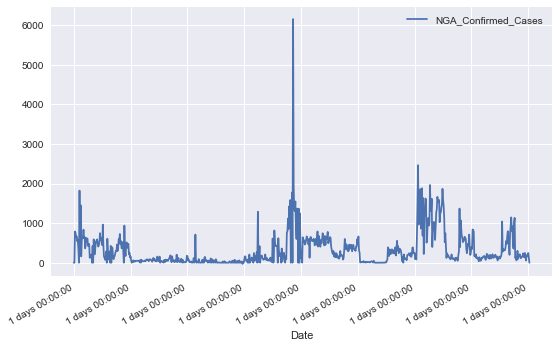

In [153]:
daily_diff_df=daily_diff.sort_values(["NGA_Confirmed_Cases"], axis=0, ascending=False)[:10]
daily_diff.plot.line(x= 'Date', y='NGA_Confirmed_Cases')
plt.show()
#daily_diff_df

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [124]:
# finding max daily infection
max_daily_infection=NGA_covid_19_case.groupby(['Date'])['NGA_Confirmed_Cases'].sum()
max_daily_infection

Date
2020-02-28         1
2020-02-29         1
2020-03-01         1
2020-03-02         1
2020-03-03         1
               ...  
2022-05-07    255766
2022-05-08    255766
2022-05-09    255766
2022-05-10    255802
2022-05-11    255802
Name: NGA_Confirmed_Cases, Length: 804, dtype: int64

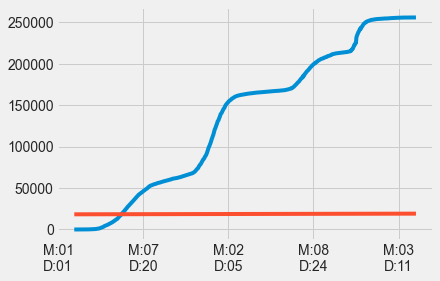

In [125]:
# finding max daily infection
max_daily_infection1 = NGA_covid_19_case[["NGA_Confirmed_Cases", 'Date']]

fig, ax = plt.subplots()
ax.plot( max_daily_infection1)
ax.xaxis.set_major_formatter(dates.DateFormatter('M:%m\nD:%d'))

plt.show()

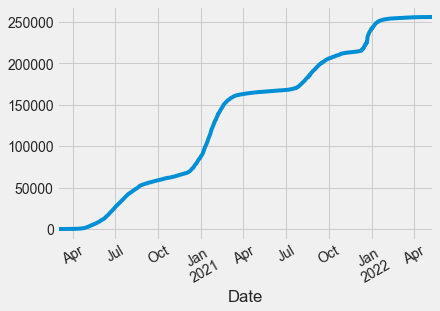

In [126]:
max_daily_infection.plot()
plt.xticks(rotation=30)
plt.show()

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [127]:
#combined_data=pd.merge(ext_df,ncdc_df['states'],on= 'states', how='inner')
combined_data=pd.merge(ext_df, ncdc_df, left_index=True, right_index=True)

In [128]:
combined_data.set_index('states_x').head()

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,states_y,No._of_Cases_Lab_Confirmed,No._of_Cases_on_admission,No._of_Discharged,No._of_Deaths
states_x,,,,,,,,,,,,,,,,
FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,Lagos,99378,547,98062,769
Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,FCT,28660,36,28376,248
Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,Rivers,16677,32,16491,154
Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85,Kaduna,11278,1,11188,89
Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,Plateau,10253,2,10176,75


In [129]:
top_10_states_confirmed_cases=combined_data.nlargest(10, ['Overall CCVI Index','No._of_Cases_Lab_Confirmed'])

In [130]:
top_10_states_confirmed_cases.reset_index()

,index,states_x,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,states_y,No._of_Cases_Lab_Confirmed,No._of_Cases_on_admission,No._of_Discharged,No._of_Deaths
0,8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,Delta,5395,114,5170,111
1,11,Yobe,North East,3723000,1.0,0.6,0.3,1.0,0.5,0.0,0.9,1.0,0.87,Akwa Ibom,4657,27,4586,44
2,9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,Ondo,5173,315,4749,109
3,16,Jigawa,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92,Anambra,2825,46,2760,19
4,17,Sokoto,North West,5612000,0.9,0.3,0.2,0.4,0.7,0.3,1.0,1.0,0.89,Nasarawa,2727,343,2345,39
5,19,Zamfara,North West,4974000,0.9,0.2,0.1,0.7,0.8,0.2,1.0,0.9,0.87,Katsina,2418,0,2381,37
6,7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,Ogun,5810,11,5717,82
7,10,Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,Kano,4988,1,4860,127
8,12,Taraba,North East,3387000,0.8,0.6,0.8,0.9,0.5,0.0,0.7,0.9,0.86,Kwara,4630,391,4175,64
9,18,Kebbi,North West,4968000,0.8,0.2,0.3,0.4,0.9,0.1,0.9,0.9,0.85,Imo,2560,22,2480,58


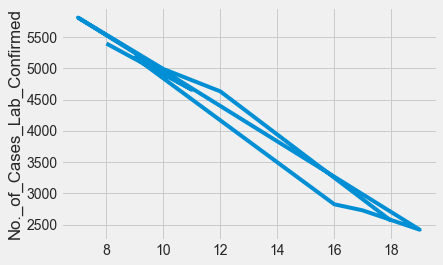

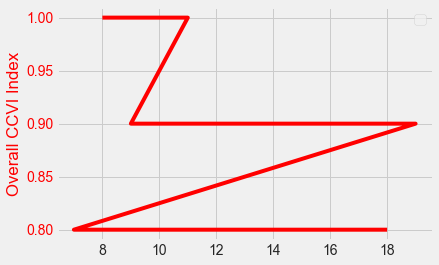

In [131]:
# Define Data  'No. of Cases (Lab Confirmed)','Overall CCVI Index'
#top_10_states_confirmed_cases
x = top_10_states_confirmed_cases
data_1= top_10_states_confirmed_cases['No._of_Cases_Lab_Confirmed']
data_2 = top_10_states_confirmed_cases['Overall CCVI Index']

  
fig = plt.figure()
ax1 = fig.add_subplot()
#plt.subplot(1,2,1)
plot_1= ax1.plot(data_1)
ax1.set_ylabel('No._of_Cases_Lab_Confirmed')

#ax2 = ax1.twinx()
fig = plt.figure()
ax2 = fig.add_subplot()
#plt.subplot(1,2,2)
plot_2 = ax2.plot(data_2, 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

#ax2 = ax1.twinx() 
  
# Add legends

lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0)

 
# Show plot

plt.show()

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

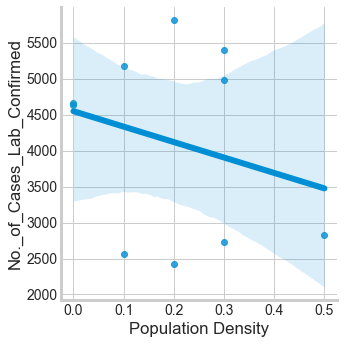

In [132]:
sns.set_style('whitegrid')
sns.lmplot(x= 'Population Density', y='No._of_Cases_Lab_Confirmed', data= top_10_states_confirmed_cases)

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [133]:
#idx_df=gdp_df.set_index('Year')
#idx_df
gdp_df
#plt.gcf()
#plt.gca()
plt.style.use('seaborn')
width= 0.2
year=gdp_df['Year'][:1]
qtr1=gdp_df['Q1']
qtr2=gdp_df['Q2']
qtr3=gdp_df['Q3']
qtr4=gdp_df['Q4']

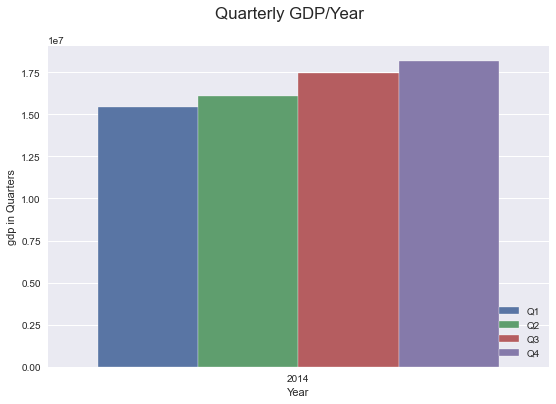

In [134]:
#fetching gdp of 2014 in quarters
plt.suptitle('Quarterly GDP/Year')
df1=gdp_df[:1]
df_char=pd.melt(df1, id_vars=['Year'], value_vars=['Q1','Q2','Q3','Q4'])
sns.barplot(data=df_char , x='Year', y='value',hue='variable')
plt.legend(loc ='lower right')
plt.ylabel( 'gdp in Quarters')
plt.show()

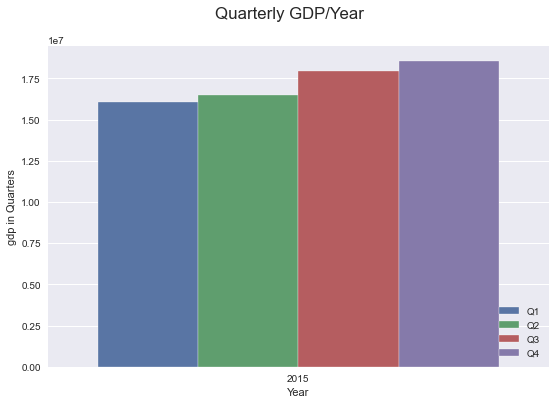

In [135]:
#fetching gdp of 2015 in quarters
plt.suptitle('Quarterly GDP/Year')
df1=gdp_df[1:2]
df_char=pd.melt(df1, id_vars=['Year'], value_vars=['Q1','Q2','Q3','Q4'])
sns.barplot(data=df_char , x='Year', y='value',hue='variable')
plt.legend(loc ='lower right')
plt.ylabel( 'gdp in Quarters')
plt.show()

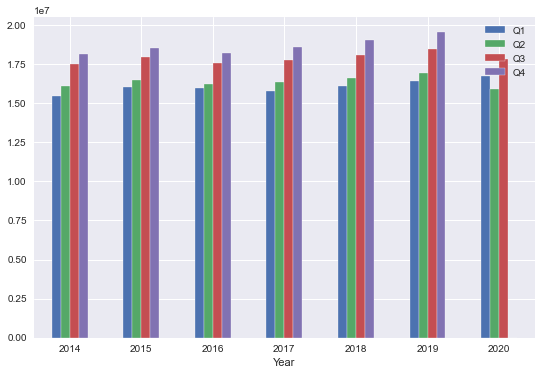

In [136]:
#bar chat for covid-19 using by passing rot=0 into barplot.
idx_df=gdp_df.set_index('Year')
ax = idx_df.plot.bar(rot=0)

In [137]:
#data =gdp_df[:4]
dt1 = idx_df[0:1]
dt2 = idx_df[1:2]
dt3 = idx_df[2:3]
dt4 = idx_df[3:4]
dt5 = idx_df[4:5]
dt6 = idx_df[5:6]
dt7 = idx_df[6:7]

<Figure size 576x396 with 0 Axes>

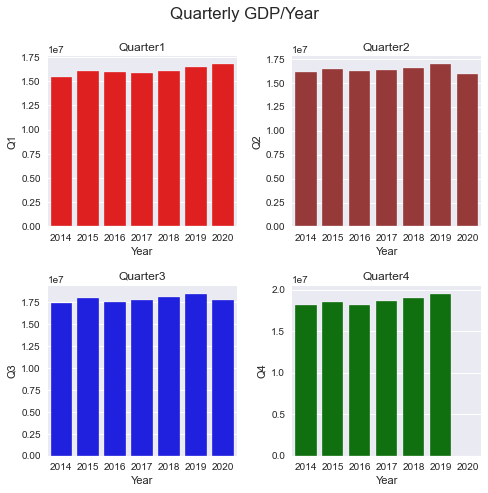

In [138]:
dt2
#plt.rcParams['bar.barwidth'] = 2
plt.figure()


barwidth=0.5
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
plt.suptitle('Quarterly GDP/Year')
sns.barplot(data=gdp_df , x='Year',color='red', y='Q1', ax=axes[0,0])
axes[0,0].set_title('Quarter1')
sns.barplot(data=gdp_df, x='Year', y='Q2', color='brown',ax=axes[0,1])
axes[0,1].set_title('Quarter2')
sns.barplot(data=gdp_df , x='Year', y='Q3', color='blue',ax=axes[1,0])
axes[1,0].set_title('Quarter3')
sns.barplot(data=gdp_df, x='Year', y='Q4',color='green',ax=axes[1,1])
axes[1,1].set_title('Quarter4')
plt.tight_layout();

In [139]:
df_char=pd.melt(gdp_df, id_vars=['Year'], value_vars=['Q1','Q2','Q3','Q4'])
df_char.head(5)

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


In [140]:
#idx_df2=[0,1,2,3,4,5,6]
xpos=np.arange(len(gdp_df))
xpos

array([0, 1, 2, 3, 4, 5, 6])

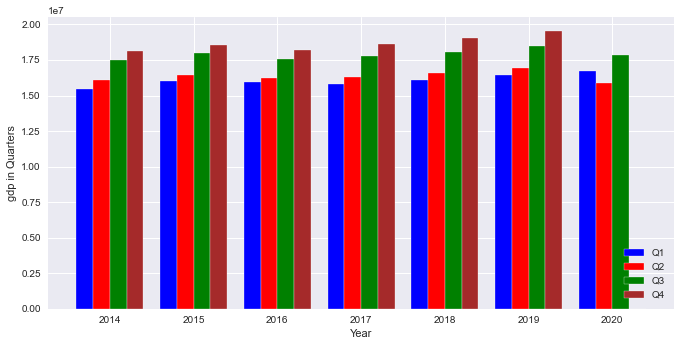

In [141]:
#style.use('ggplot')
barwidth = 0.2
fig= plt.figure(figsize=(10,5))
#plt.subplot(2,2,1)
plt.bar(xpos,qtr1, color='blue', width= barwidth, label ='Q1' )
plt.bar(xpos+0.2,qtr2, color='red',width= barwidth, label ='Q2')
plt.bar(xpos+0.4, qtr3, color='green',width= barwidth, label ='Q3')
plt.bar(xpos+0.6, qtr4, color='brown',width= barwidth, label ='Q4')
plt.xticks(xpos+0.3,('2014', '2015','2016','2017','2018','2019','2020'))
plt.xlabel('Year')
plt.ylabel( 'gdp in Quarters')
plt.legend(loc='lower right')




##### The observation of the graph above base on effect of covid_19 on gdp.
##### the we have a constant gdp since 2014 in all quarters till 2018. while 2019 slight difference in the last quarter.
###### in contrary, second and thrid of 2020 dropped significantly. while no gdp was recorded for the last quarter of the particular year. whichwas as result of dreadful covid in that period.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

###### which states has high rated  health system.
###### with this analysis we are trying to find out the states that has better health system

In [142]:
ext_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


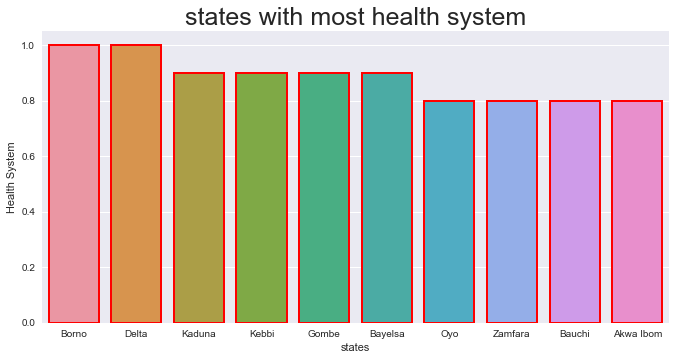

In [143]:
exd_df= ext_df.groupby(by= 'states').max()[['Health System']].sort_values(by= ['Health System'], ascending=False).reset_index()
fig=plt.figure(figsize=(10,5))
plt.title('states with most health system', size=25)
ax = sns.barplot(data=exd_df.iloc[:10],y= 'Health System', x = 'states', linewidth=2, edgecolor = 'red')
plt.xlabel('states')
plt.ylabel('Health System')
plt.show()

##### the chart above indicate the state with highest health system.
#### Borno and Delta top the chart with 1.0, while, kaduna, kebbi, Gombe and bayelsa with the chart by 0.9